In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ServiceTrain.csv")
df

,OilQual,EnginePerf,NormMileage,TyreWear,HVACwear,Service
0,103.388821,103.504032,103.051485,106.172658,105.6868429,No
1,26.765516,26.188265,31.259536,29.186162,31.31127506,Yes
2,62.413282,63.681061,59.720883,64.704031,58.62051752,Yes
3,45.533338,49.906615,48.777581,48.113851,?,No
4,104.388821,103.284032,103.051485,105.822658,106.5368429,No
...,...,...,...,...,...,...
312,104.388821,105.744032,103.051485,105.782658,104.1968429,No
313,63.823282,62.741061,59.720883,61.654031,62.62051752,Yes
314,26.535516,27.418265,31.259536,27.486162,33.31127506,Yes
315,26.215516,26.338265,31.259536,27.036162,31.31127506,Yes


In [2]:
df.isna().sum()

OilQual        0
EnginePerf     1
NormMileage    2
TyreWear       2
HVACwear       1
Service        0
dtype: int64

In [3]:
df.dtypes

OilQual        float64
EnginePerf     float64
NormMileage    float64
TyreWear       float64
HVACwear        object
Service         object
dtype: object

In [4]:
df=df.replace('?',np.NaN)
df.isna().sum()

OilQual        0
EnginePerf     1
NormMileage    2
TyreWear       2
HVACwear       2
Service        0
dtype: int64

In [5]:
avg1 = df["EnginePerf"].astype('float').mean()
avg2 = df["NormMileage"].astype('float').mean()
avg3 = df["TyreWear"].astype('float').mean()
mode = df["HVACwear"].astype('str').mode()
df['EnginePerf'].replace(np.NaN,avg1,inplace=True)
df['NormMileage'].replace(np.NaN,avg2,inplace=True)
df['TyreWear'].replace(np.NaN,avg3,inplace=True)
df['HVACwear'].replace(np.NaN,mode.iloc[0],inplace=True)

C:\Users\admin\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OilQual'>

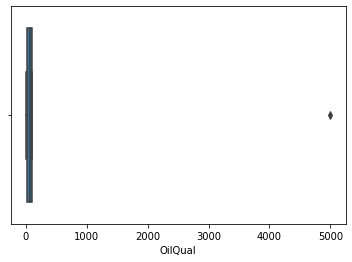

In [6]:
sns.boxplot(df["OilQual"])

In [7]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [8]:
lowoilqual,upperoilqual=remove_outlier(df['OilQual'])
df['OilQual']=np.where(df['OilQual']>upperoilqual,upperoilqual,df['OilQual'])
df['OilQual']=np.where(df['OilQual']<lowoilqual,lowoilqual,df['OilQual'])

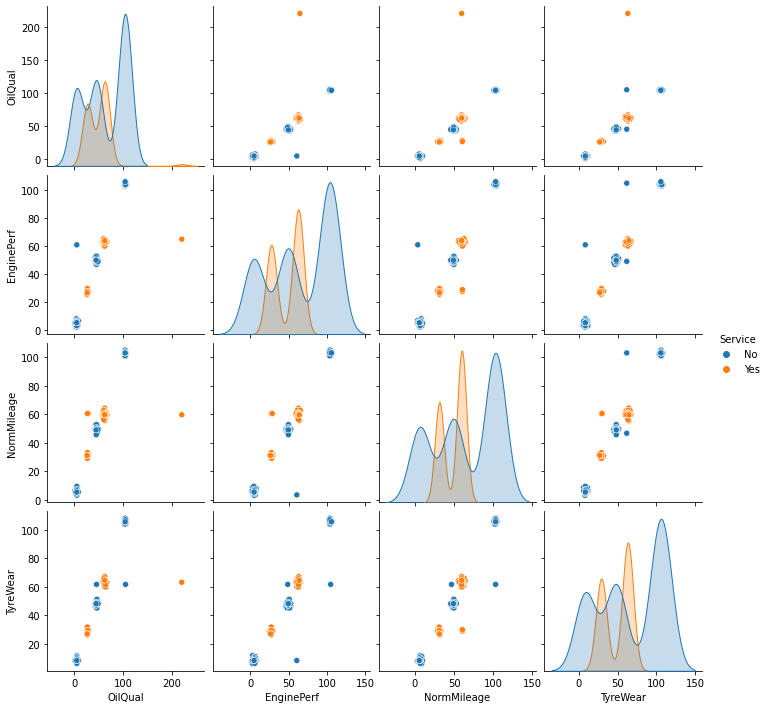

In [9]:
sns.pairplot(data=df, hue = 'Service')

<AxesSubplot:>

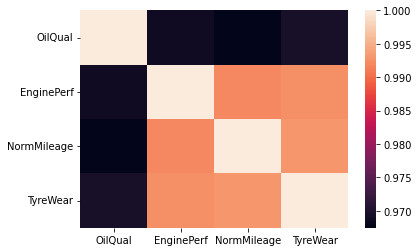

In [10]:
sns.heatmap(df.corr())

In [11]:
X = df.iloc[:,:-1]
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

In [13]:
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

[[74  1]
 [10 11]]
Accuracy: 81.94 %
Standard Deviation: 7.47 %
